# Exploratory Data Analysis

This notebook verifies that the data loading pipeline is working and inspects the quality of the Wikipedia embeddings and Bloomberg factor data.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from adv_hedging.data.loaders import load_wiki_data, load_risk_factors

# Set plotting style
plt.style.use('ggplot')

## 1. Load and Inspect Wikipedia Data
This uses our custom loader which automatically fixes the 'Veralto' and 'UMB' bad URLs.

In [2]:
# This uses the cleaning logic we defined in src/adv_hedging/data/cleaning.py
df_wiki = load_wiki_data()
df_wiki.head()

,ticker,name,sector,industry,content,URL,title,embedding_mpnet,embedding_bge_large,embedding_bge_small
0,ZTS,Zoetis Inc,Health Care,Pharmaceuticals,Title: Zoetis\nURL: https://en.wikipedia.org/w...,https://en.wikipedia.org/wiki/Zoetis,Zoetis,"[0.014501823, -0.0009807413, -0.02404803, -0.0...","[0.0001828246, -0.026973305, 0.024251422, 0.01...","[0.020133665, -0.008513564, -0.022554256, 0.02..."
1,ZS,Zscaler Inc,Information Technology,Software,Title: Zscaler\nURL: https://en.wikipedia.org/...,https://en.wikipedia.org/wiki/Zscaler,Zscaler,"[0.009020114, -0.012889062, -0.011095319, -0.0...","[-0.0014631954, 0.0033661372, 0.021692174, -0....","[-0.022805821, -0.059095662, -0.06233933, -0.0..."
2,ZM,Zoom Communications Inc,Information Technology,Software,Title: Zoom Communications\nURL: https://en.wi...,https://en.wikipedia.org/wiki/Zoom_Communications,Zoom Communications,"[0.017792817, -0.048861224, -0.009158679, -0.0...","[0.013439191, -0.027326003, -0.008322666, 0.01...","[-0.035346173, -0.02221711, -0.0278312, -0.031..."
3,ZION,Zions Bancorp NA,Financials,Banks,Title: Zions Bancorporation\nURL: https://en.w...,https://en.wikipedia.org/wiki/Zions_Bancorpora...,Zions Bancorporation,"[-0.01601603, -0.030419953, -0.0146953575, -0....","[0.008454562, -0.023495518, -0.0023520405, 0.0...","[-0.013878664, -0.017782524, -0.07974591, 0.01..."
4,ZBH,Zimmer Biomet Holdings Inc,Health Care,Health Care Equipment & Supplies,Title: Zimmer Biomet\nURL: https://en.wikipedi...,https://en.wikipedia.org/wiki/Zimmer_Biomet,Zimmer Biomet,"[-0.0011577223, -0.04769175, -0.008060667, -0....","[0.008194411, -0.006104517, 0.022345973, 0.023...","[-0.0069796643, -0.0045109824, -0.07010397, 0...."


### Verify Data Cleaning
Let's check if the specific bad rows identified in the project requirements were fixed.

In [4]:
bad_tickers = ['VLTO', 'UMBF']
print("Checking corrected URLs for bad tickers:")

# These should now point to specific company pages, not "List_of_S&P..."
display(df_wiki[df_wiki['ticker'].isin(bad_tickers)][['ticker', 'URL', 'title']])

Checking corrected URLs for bad tickers:


,ticker,URL,title
44,VLTO,https://en.wikipedia.org/wiki/Veralto,List of S&P 500 companies
58,UMBF,https://en.wikipedia.org/wiki/List_of_S%26P_40...,List of S&P 400 companies


## 2. Load and Inspect Risk Factors
Loading the Bloomberg Excel file.

In [5]:
df_factors = load_risk_factors()
print(f"Loaded {len(df_factors)} rows from Bloomberg data.")

# Show available factors
print("Columns available:", df_factors.columns.tolist()[:10])

Loaded 667 rows from Bloomberg data.
Columns available: ['Ticker', 'Short Name', 'Ticker.1', 'BICS L1 Sect Nm', 'BICS L2 IG Nm', 'BICS L3 Ind Nm', 'PORT US Sz Fact Exp:D-1', 'PORT US Prof Fact Exp:D-1', 'PORT US Vol Fact Exp:D-1', 'PORT US Trd Act Fact Exp:D-1']


## 3. Sector Distribution
Visualizing the coverage of our universe.

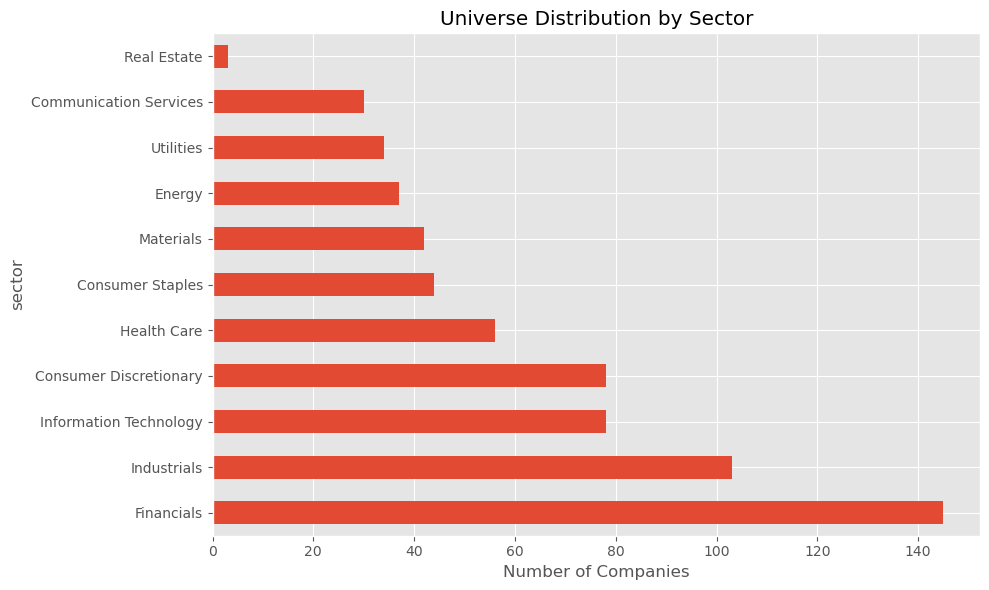

In [6]:
sector_counts = df_wiki['sector'].value_counts()

plt.figure(figsize=(10, 6))
sector_counts.plot(kind='barh')
plt.title("Universe Distribution by Sector")
plt.xlabel("Number of Companies")
plt.tight_layout()
plt.show()

## 4. Next Steps
Now that the data infrastructure is verified, proceed to `01_factor_model_construction.ipynb` to build the risk model.

In [ ]:
############################################################ END OF FILE ############################################################